In [46]:
%matplotlib inline

[0, 110, 112, 113, 120, 124, 128, 132, 133, 141, 152, 156, 166, 181, 194, 211, 214, 244, 257, 258]


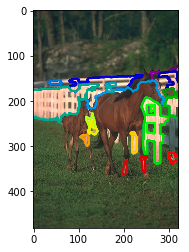

In [47]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
import scipy

img = data.coffee()
image = "/home/yy/matlab/BSR/BSDS500/data/images/train/" + "113009.jpg"
img = scipy.misc.imread(image)
labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

# fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

# ax[0].imshow(out1)
# ax[1].imshow(out2)

# for a in ax:
#     a.axis('off')

# plt.tight_layout()

labelVec = []
for i in range(labels2.shape[0]):
    for j in range(labels2.shape[1]):
        if labels2[i][j] not in labelVec:
            labelVec.append(labels2[i][j])
print(labelVec)
plt.figure()
plt.imshow(img)
for l in range(len(labelVec)):
    plt.contour(labels2==labelVec[l], contour=1, colors=[plt.cm.spectral(l/float(len(labelVec)))])
plt.show()


# Normalized Cut


This example constructs a Region Adjacency Graph (RAG) and recursively performs
a Normalized Cut on it [1]_.

References
----------
.. [1] Shi, J.; Malik, J., "Normalized cuts and image segmentation",
       Pattern Analysis and Machine Intelligence,
       IEEE Transactions on, vol. 22, no. 8, pp. 888-905, August 2000.

